In this project, we developed an image classification model using CNN on the CIFAR-10 dataset. The process was divided into 5 key steps:
1. data exploration & preprocessing
2. Basic CNN model
3. Model evaulation
4. Model improvement
5. Combined model

# Step 1
1. We used tensorflow function 'cifar10.load_data()' function to load the dataset. The dataset contains 60,000 color images of size 32 x 32 pixels across 10 classes. 50,000 images for training & 10,000 for testing.
2. To better understand the dataset, we visualized 10 sample images from the training set using 'matplotlib'. Each image is labeled using the corresponding class name for easier interpretation.
3. Next, we visualized the class distribution using 'sns.countplot' to ensure that the dataset is balanced. This shows how many images there are for each class in the training set.
4. The pixel values of the images originally range from 0 to 255. We normalized them to the range [0,1] by dividing each value by 255. This helps themodel train more efficiently and converge faster.
5. The original labels are integers representing the class indices. We converted then to one hot encoded vectors using 'to_categorical()' so they can be used in categorical classification.
6. We split the original training data into a new training set and a validation set using 'train_test_split()'. We used an 80/20 split and applied stratification to maintain the class balance across the two sets.

- The data is now normalized, labeled, split into training, validation & testing.


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


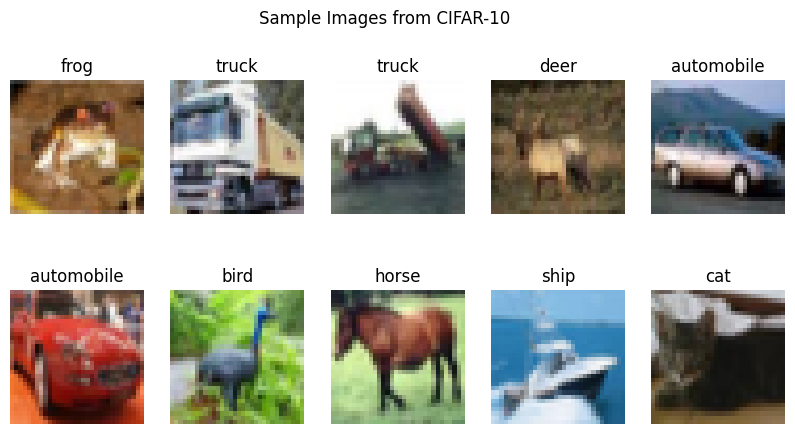

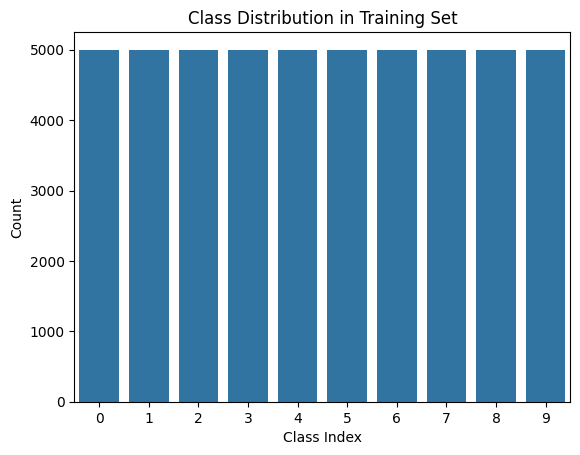

In [ ]:
# BUAN 6382 - Deep Learning - Project 1
# CIFAR-10 Image Classification using CNNs

# ========================================
# Step 1: Data Exploration and Preprocessing
# ========================================

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

#load CIFAR-10 data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

#visualize some of the images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.suptitle("Sample Images from CIFAR-10")
plt.show()
print(f"\n")

#look at the class distribution
sns.countplot(x=y_train.flatten())
plt.title("Class Distribution in Training Set")
plt.xlabel("Class Index")
plt.ylabel("Count")
plt.show()

#normalize the pixel values
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

#one-hot encode the labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

#quick testing
#USE_SMALL_SET = False
#if USE_SMALL_SET:
    #X_train, _, y_train, _ = train_test_split(X_train, y_train, train_size=0.75, stratify=y_train)

#split the data into training and validation sets
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)


# Step 2
1. We created a CNN using Keras 'Sequential' API.
2. We compiled the model using 'Adam' optimizer (it adapts the learning rate during training), 'categorical_crossentropy' loss function (suitable for multi-class classification problems), 'Accuracy' metrics to track the model's performance.
3. Then we trained the model using the prepared training data for 10 epochs with a batch size of 64. Validataion data was used to monitor overfitting.
4. We plotted both accuracy and loss for training and validation sets over epochs. This helps us understand how the model learns over time and spot any overfitting or underfitting.

- The accuracy plot shows a consistent improvement for training and validation.
- The model did not overfit heavily, as validation accuracy remained higher than training.
- The loss plot shows that training and validation losses steadily decreased.
- validation loss reached about 1.0 by epoch 9, indicating good learning behavior.



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         147,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 167,562 (654.54 KB)

 Trainable params: 167,562 (654.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 83ms/step - accuracy: 0.2217 - loss: 2.0767 - val_accuracy: 0.4681 - val_loss: 1.5069
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 83ms/step - accuracy: 0.3969 - loss: 1.6291 - val_accuracy: 0.5307 - val_loss: 1.3624
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 80ms/step - accuracy: 0.4450 - loss: 1.4994 - val_accuracy: 0.5598 - val_loss: 1.2590
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 81ms/step - accuracy: 0.4792 - loss: 1.4097 - val_accuracy: 0.5906 - val_loss: 1.1736
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 81ms/step - accuracy: 0.5122 - loss: 1.3329 - val_accuracy: 0.6031 - val_loss: 1.1353
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 83ms/step - accuracy: 0.5398 - loss: 1.2651 - val_accuracy: 0.6121 - val_loss: 1.0916
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 80ms/step - accuracy: 0.5545 - loss: 1.2402 - val_accuracy: 0.6346 - val_loss: 1.0673
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 85s 85ms/step - accuracy: 0.5776 - loss: 1.1731 - 

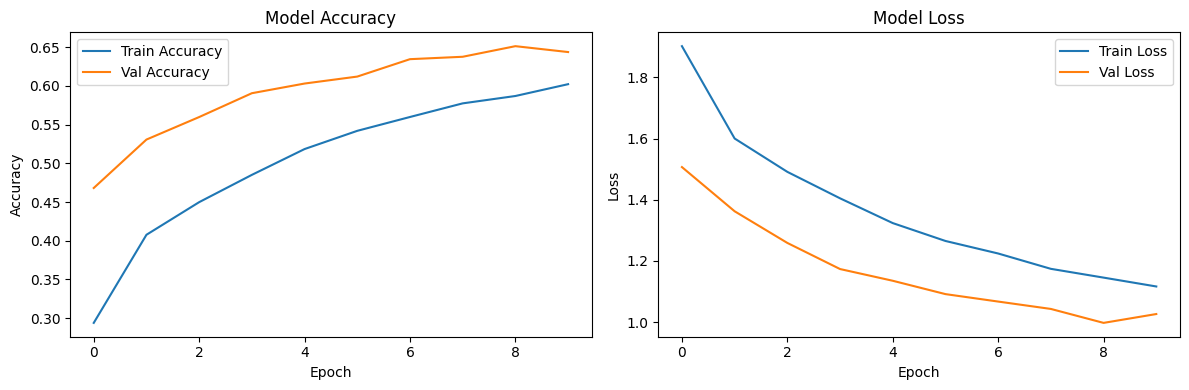

In [ ]:
# ========================================
# Step 2: Building a Basic CNN
# ========================================

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
#make the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.summary()
#compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
#train the model
history = model.fit(
    X_train_final, y_train_final,
    epochs=10,
    batch_size=64,
    validation_data=(X_val, y_val)
)

#Plot the training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.tight_layout()
plt.show()

# Step 3
1. We used the trained CNN model to predict class probabilities for the test dataset. The predicted probabilities were then converted to class labels using 'argmax()'.
2. To evaluated how well the model performs on unseen data, we computed the following metrics: Accuracy, Precision, Recall, F1-score. We used 'classification_report()' to generate all these metrics for each class.
3. Then we visualized a confusion matrix to see where the model is getting predictions right or wrong.

- Classification report:
  - best performing classes - Automobile (F1-score 0.79), Ship (F1-score 0.76), Truck (F1-score 0.74)
  - weaker performance - Bird (F1-score 0.41), Cat (F1-score 0.47)
  - overall test accuracy is 65%.
- The confusion matrix shows us that:
    - Birds are frequently misclassified as Cats, Deer, and Dogs
    - Cats are often confused with Dogs and Deer
    - Frogs, Trucks and Ships show strong classification performance with minimal confusion. (predicted well)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
              precision    recall  f1-score   support

    airplane       0.78      0.63      0.70      1000
  automobile       0.82      0.76      0.79      1000
        bird       0.62      0.31      0.41      1000
         cat       0.46      0.47      0.47      1000
        deer       0.56      0.57      0.57      1000
         dog       0.58      0.54      0.56      1000
        frog       0.58      0.87      0.70      1000
       horse       0.66      0.77      0.71      1000
        ship       0.80      0.72      0.76      1000
       truck       0.66      0.83      0.74      1000

    accuracy                           0.65     10000
   macro avg       0.65      0.65      0.64     10000
weighted avg       0.65      0.65      0.64     10000



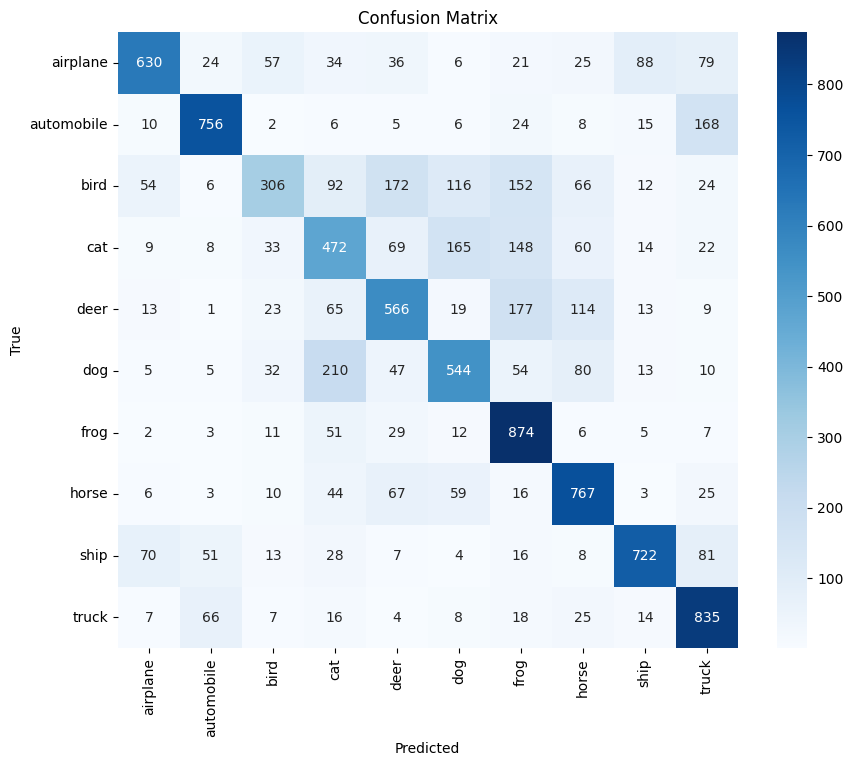

In [ ]:
# ========================================
# Step 3: Model Evaluation
# ========================================

y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

print(classification_report(y_true_classes, y_pred_classes, target_names=class_names))
#CONFUSION MATRIX
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


# Step 4
1. In this step, we deepened the network by adding more 'Conv2D layers', allowing the model to extract more complex patterns.
  - Increased filters from 32 to 64
  - Used 'L2 Regularization' to reduce overfitting.
  - Added a 'Dropout layer' to randomly deactivated neurons during training.
2. To make the model more robust and less prone to overfitting, we used 'ImageDataGenerator' class to apply real time data augmentation.
3. We used the 'Adam' optimizer but lowered the learning rate to 0.0005. This allows for finer adjustments to the weights and typically leads to better convergence in deeper models.
4. We implemented 'EarlyStopping' to monitor the validation loss and stop training if it doesn't improve for 3 consecutive epochs. This helps avoid unnecessary training and reduces overfitting.
5. The imporved model is trained using the augmented data generator for up to 20 epochs.

- The improved model achieved a test accuracy of 70%, up from 65% in the initial model.
  - Automobile: F1 score improved from 0.79 to 0.84
  - Frog: F1 Score improved from 0.7 to 0.73
  - SHip: F1 score improved from 0.76 to 0.83
  - Truck: F1 score improved from 0.74 to 0.81

- Some remain challenging classes
  - Cat: F1 score decreased from 0.47 to 0.42
  - Bird: F1 score is still low but improved in precision

- The confusion matrix shows tighter clustering along the diagonal, meaning fewer misclassifications than the previous model.

In [ ]:
# ========================================
# Step 4: Model Improvement
# ========================================

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

model_improved = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

#data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train_final)

#compile with adjusted learning rate
optimizer = Adam(learning_rate=0.0005)
model_improved.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

#add in the early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

#Train using the improved model
history_aug = model_improved.fit(
    datagen.flow(X_train_final, y_train_final, batch_size=64),
    epochs=20,
    validation_data=(X_val, y_val),
    callbacks=[early_stop]
)




/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 156s 244ms/step - accuracy: 0.2413 - loss: 2.1368 - val_accuracy: 0.4300 - val_loss: 1.6471
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 152s 243ms/step - accuracy: 0.4153 - loss: 1.6587 - val_accuracy: 0.5253 - val_loss: 1.3865
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 151s 242ms/step - accuracy: 0.4704 - loss: 1.5201 - val_accuracy: 0.5267 - val_loss: 1.3922
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 148s 237ms/step - accuracy: 0.5036 - loss: 1.4349 - val_accuracy: 0.6023 - val_loss: 1.1719
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 150s 239ms/step - accuracy: 0.5402 - loss: 1.3519 - val_accuracy: 0.6033 - val_loss: 1.1790
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 150s 240ms/step - accuracy: 0.5604 - loss: 1.2981 - val_accuracy: 0.6223 - val_loss: 1.1250
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 201s 239ms/step - accuracy: 0.5895 - loss: 1.2351 - val_accuracy: 0.6491 - val_loss: 1.0826
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 153s 244ms/step - accuracy: 0.5964 - loss: 1.20

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step
              precision    recall  f1-score   support

    airplane       0.77      0.76      0.76      1000
  automobile       0.88      0.81      0.84      1000
        bird       0.73      0.37      0.49      1000
         cat       0.57      0.33      0.42      1000
        deer       0.59      0.70      0.64      1000
         dog       0.57      0.69      0.62      1000
        frog       0.63      0.88      0.73      1000
       horse       0.72      0.78      0.75      1000
        ship       0.83      0.83      0.83      1000
       truck       0.76      0.86      0.81      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.69     10000
weighted avg       0.70      0.70      0.69     10000



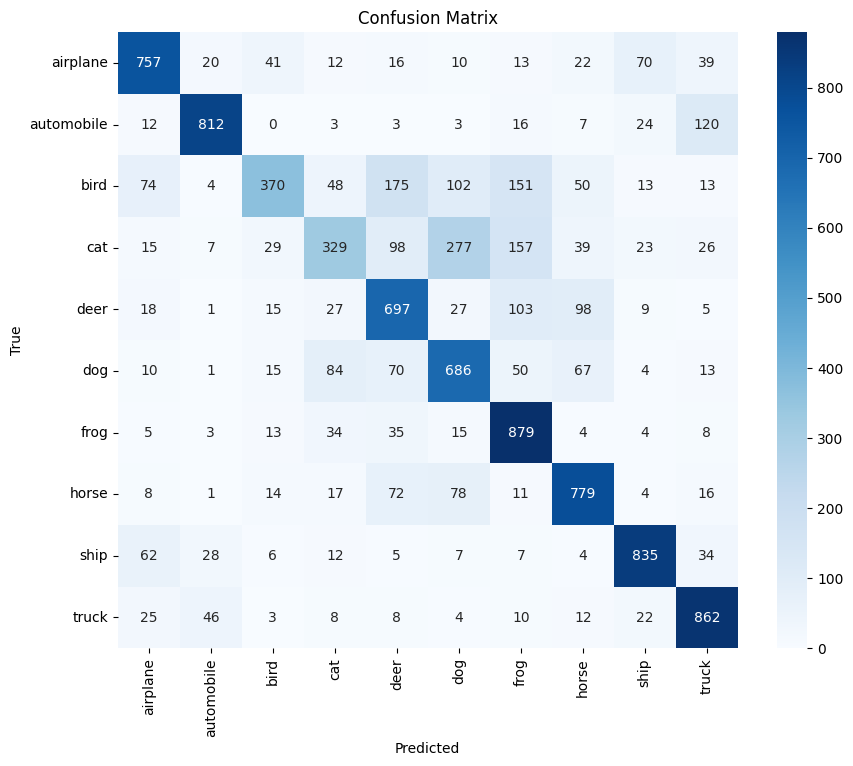

In [ ]:

y_pred_probs = model_improved.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

print(classification_report(y_true_classes, y_pred_classes, target_names=class_names))
#confusion matrix

conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

Running a few things to check how they improve the model


## Step 4.1

In step 4.1, we decided that we needed to make adjustments to our model in order to improve accuracy. In order to do so, we made efforts to make the model deeper by increasing Conv2D from 32, to 64 and 128. This was able to improve the mdoel as we can see improvements in birds, dogs, frogs and trucks. These improvements also made our model better, as accuracy increased from 70% to 72%. By adding more convolutional layers, we were proviing the model the ability to have more learnign power. This was important as the differences between, for example, animals are slight and the more features and patterns we are able to gather will improve the model. However, despite these improvements there are still some weak spots that should be rexamined, like cats, which has the weakest score of 0.55, along with dog which has 0.62 and bird with 0.57 (even though dog and bird improved, they need to improve more).


In [ ]:
# Import necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define a deeper CNN model
model_deep = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # Final output layer for 10 classes
])

# Compile the model
model_deep.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the deeper model
history_deep = model_deep.fit(
    X_train_final, y_train_final,
    epochs=10,
    batch_size=64,
    validation_data=(X_val, y_val)
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 198s 309ms/step - accuracy: 0.3318 - loss: 1.8070 - val_accuracy: 0.5340 - val_loss: 1.2880
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 205s 315ms/step - accuracy: 0.5690 - loss: 1.2068 - val_accuracy: 0.6186 - val_loss: 1.1120
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 188s 294ms/step - accuracy: 0.6442 - loss: 1.0195 - val_accuracy: 0.6572 - val_loss: 0.9901
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 160s 226ms/step - accuracy: 0.6881 - loss: 0.8944 - val_accuracy: 0.6815 - val_loss: 0.9160
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 139s 222ms/step - accuracy: 0.7257 - loss: 0.7807 - val_accuracy: 0.6824 - val_loss: 0.9056
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 144s 226ms/step - accuracy: 0.7578 - loss: 0.6920 - val_accuracy: 0.7178 - val_loss: 0.8237
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 139s 222ms/step - accuracy: 0.7865 - loss: 0.6160 - val_accuracy: 0.7241 - val_loss: 0.8092
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 137s 219ms/step - accuracy: 0.8072 -

In [ ]:
#Predict on the test set
y_pred_probs_deep = model_deep.predict(X_test)
y_pred_deep = np.argmax(y_pred_probs_deep, axis=1)
y_true = np.argmax(y_test, axis=1)

#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred_deep, target_names=class_names))

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step
              precision    recall  f1-score   support

    airplane       0.75      0.75      0.75      1000
  automobile       0.83      0.87      0.85      1000
        bird       0.57      0.67      0.62      1000
         cat       0.55      0.55      0.55      1000
        deer       0.72      0.57      0.64      1000
         dog       0.62      0.63      0.62      1000
        frog       0.71      0.84      0.77      1000
       horse       0.82      0.74      0.78      1000
        ship       0.84      0.81      0.82      1000
       truck       0.86      0.79      0.83      1000

    accuracy                           0.72     10000
   macro avg       0.73      0.72      0.72     10000
weighted avg       0.73      0.72      0.72     10000



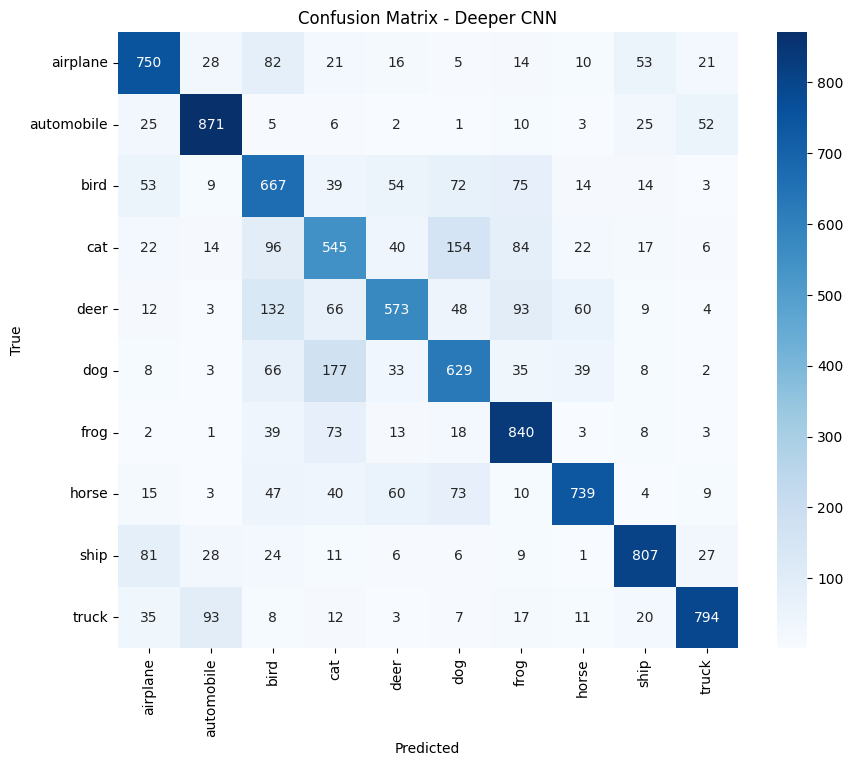

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
#Confusion matrix

conf_matrix_deep = confusion_matrix(y_true, y_pred_deep)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_deep, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Deeper CNN")
plt.show()

## Step 4.2

In Step 4.2, we decided to add a dropout and a regularizer L2 in order to help prevent overfitting. These changes aimed to improve the model’s ability to generalize beyond the training data. As a result, the overall accuracy increased to 73%, showing a modest performance gain. Notably, the dog and ship classes exhibited better generalization, with improved metrics compared to earlier stages where they had been overfitting. However, some weaknesses remained: there was a slight decline in recall for the bird class, and the cat class continued to perform poorly, maintaining an F1-score around 52%. The improvement can largely be attributed to the regularization techniques, which reduced the gap between training and validation accuracy. This suggests that the model is learning more robust features and is less likely to memorize the training data, especially for classes that were previously showing signs of overfitting.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2

#the regularized CNN model
model_regularized = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#compile
model_regularized.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#train using the model with regularization
history_reg = model_regularized.fit(
    X_train_final, y_train_final,
    epochs=10,
    batch_size=64,
    validation_data=(X_val, y_val)
)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 156s 245ms/step - accuracy: 0.2636 - loss: 2.0610 - val_accuracy: 0.4787 - val_loss: 1.4907
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 194s 232ms/step - accuracy: 0.4892 - loss: 1.4923 - val_accuracy: 0.5789 - val_loss: 1.2481
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 143s 229ms/step - accuracy: 0.5528 - loss: 1.3450 - val_accuracy: 0.6239 - val_loss: 1.1851
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 142s 228ms/step - accuracy: 0.5900 - loss: 1.2492 - val_accuracy: 0.6479 - val_loss: 1.1139
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 210s 240ms/step - accuracy: 0.6205 - loss: 1.1725 - val_accuracy: 0.6827 - val_loss: 1.0086
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 143s 228ms/step - accuracy: 0.6424 - loss: 1.1383 - val_accuracy: 0.6957 - val_loss: 0.9716
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 203s 231ms/step - accuracy: 0.6642 - loss: 1.0856 - val_accuracy: 0.7062 - val_loss: 0.9624
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 199s 226ms/step - accuracy: 0.6733 -

In [ ]:
#predict on the test set
y_pred_probs_reg = model_regularized.predict(X_test)
y_pred_reg = np.argmax(y_pred_probs_reg, axis=1)

#classification report
print(classification_report(y_true, y_pred_reg, target_names=class_names))

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step
              precision    recall  f1-score   support

    airplane       0.75      0.74      0.74      1000
  automobile       0.85      0.87      0.86      1000
        bird       0.63      0.56      0.59      1000
         cat       0.55      0.49      0.52      1000
        deer       0.74      0.61      0.67      1000
         dog       0.62      0.68      0.65      1000
        frog       0.69      0.86      0.77      1000
       horse       0.80      0.76      0.78      1000
        ship       0.77      0.89      0.83      1000
       truck       0.84      0.81      0.83      1000

    accuracy                           0.73     10000
   macro avg       0.72      0.73      0.72     10000
weighted avg       0.72      0.73      0.72     10000



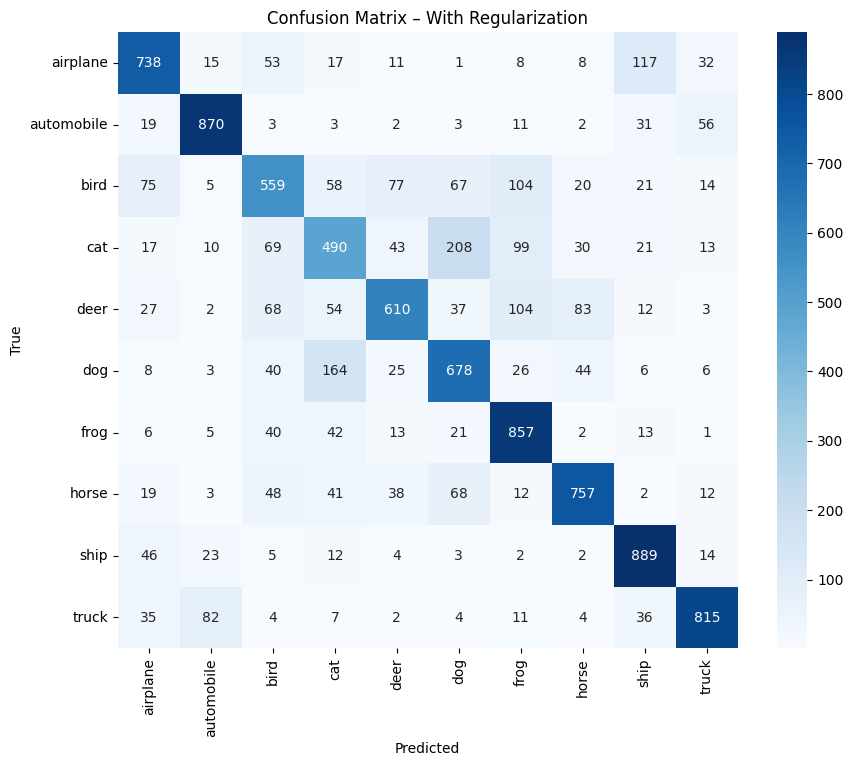

In [ ]:
#confusion matrix
conf_matrix_reg = confusion_matrix(y_true, y_pred_reg)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_reg, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix – With Regularization")
plt.show()


## Step 4.3

In Step 4.3, data augmentation was introduced by applying transformations such as rotations, flips, and shifts during training to increase the diversity of the training data. This technique is intended to improve the model’s ability to generalize by exposing it to more realistic variations of the input. As a result, the overall accuracy slightly dropped to 70%, which is a common short-term effect when augmentation introduces more complexity. Interestingly, bird precision improved to 0.78, indicating that the model became more confident when predicting bird images, though recall decreased to 0.43, meaning it missed more actual birds. Meanwhile, cat and dog performance declined, suggesting that these classes became harder to classify under the augmented conditions. However there is a tradeoff when it comes to augumented models, while it reduces overfitting and promotes better generalization, it also introduces noise that can make training more difficult and slower to converge. The model likely requires additional training epochs to fully adapt and benefit from the augmented data. On a positive note, ship, truck, and horse classes showed strong performance, indicating that these categories possess more generalizable visual features that the model can still recognize well, even under augmented conditions.

In [ ]:
#use ImageDataGenerator in order to do the augmenting
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

#use the generator for the training data
datagen.fit(X_train_final)

In [ ]:
#same model as used before (the deeper model)
model_aug = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])


model_aug.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#Train using the data augmentation
history_aug = model_aug.fit(
    datagen.flow(X_train_final, y_train_final, batch_size=64),
    epochs=10,
    validation_data=(X_val, y_val)
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 167s 264ms/step - accuracy: 0.3126 - loss: 1.8725 - val_accuracy: 0.4919 - val_loss: 1.3699
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 162s 259ms/step - accuracy: 0.4871 - loss: 1.4173 - val_accuracy: 0.5715 - val_loss: 1.2043
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 203s 260ms/step - accuracy: 0.5528 - loss: 1.2437 - val_accuracy: 0.6284 - val_loss: 1.0636
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 164s 263ms/step - accuracy: 0.5884 - loss: 1.1544 - val_accuracy: 0.6380 - val_loss: 1.0423
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 162s 259ms/step - accuracy: 0.6265 - loss: 1.0520 - val_accuracy: 0.6577 - val_loss: 0.9851
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 162s 260ms/step - accuracy: 0.6486 - loss: 0.9957 - val_accuracy: 0.6740 - val_loss: 0.9318
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 204s 263ms/step - accuracy: 0.6703 - loss: 0.9356 - val_accuracy: 0.7098 - val_loss: 0.8482
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 157s 251ms/step - accuracy: 0.6817 -

In [ ]:
#Predict on the test set
y_pred_probs_aug = model_aug.predict(X_test)
y_pred_aug = np.argmax(y_pred_probs_aug, axis=1)

print(classification_report(y_true, y_pred_aug, target_names=class_names))

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step
              precision    recall  f1-score   support

    airplane       0.75      0.76      0.75      1000
  automobile       0.84      0.88      0.86      1000
        bird       0.78      0.43      0.55      1000
         cat       0.62      0.40      0.49      1000
        deer       0.63      0.65      0.64      1000
         dog       0.75      0.47      0.57      1000
        frog       0.57      0.89      0.69      1000
       horse       0.73      0.77      0.75      1000
        ship       0.70      0.91      0.79      1000
       truck       0.72      0.84      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.69     10000
weighted avg       0.71      0.70      0.69     10000



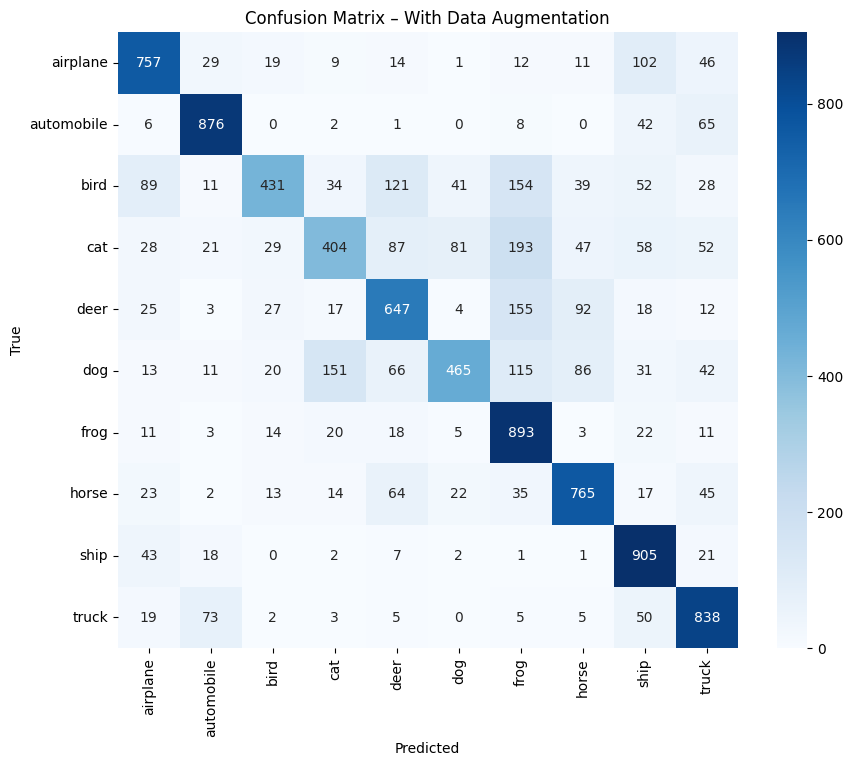

In [ ]:
#confusion matrix
conf_matrix_aug = confusion_matrix(y_true, y_pred_aug)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_aug, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix – With Data Augmentation")
plt.show()

## Step 4.4

In Step 4.4, hyperparameter tuning was performed by adjusting key training settings: the learning rate was lowered, the batch size was increased, and the model was trained for 20 epochs. These changes aimed to allow the model to learn more gradually and make finer updates to its weights. As a result, the overall accuracy rose slightly to 71%. Notable improvements were observed in the cat class, with recall jumping to 0.64, and airplane precision reaching its highest level so far at 0.79, indicating the model became more accurate and confident in identifying these categories. However, some weaknesses remained—bird recall stayed relatively low at 0.52, and truck recall was lower than expected, suggesting inconsistent generalization across all classes. The tuning was effective particularly for "smoother" or more visually consistent classes like airplane, ship, and automobile, which benefited from the model’s more controlled and steady learning process. That said, the model still shows signs of subtle overfitting, and would likely benefit from maintaining or reintroducing regularization and data augmentation alongside these tuned hyperparameters to achieve more robust, balanced performance across all classes.

In [ ]:
#use Adam optimizer
from tensorflow.keras.optimizers import Adam

#deeper model used
model_tuned = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

#Use the adjusted complier with the lower learning rate
optimizer_tuned = Adam(learning_rate=0.0005)

model_tuned.compile(
    optimizer=optimizer_tuned,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#train the data with the tuned hyperparameters
history_tuned = model_tuned.fit(
    X_train_final, y_train_final,
    epochs=20,               #increase the number of epochs
    batch_size=128,          #mak the batch size larger
    validation_data=(X_val, y_val)
)

Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 151s 474ms/step - accuracy: 0.2918 - loss: 1.9206 - val_accuracy: 0.4936 - val_loss: 1.4086
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 200s 470ms/step - accuracy: 0.5080 - loss: 1.3804 - val_accuracy: 0.5581 - val_loss: 1.2430
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 199s 459ms/step - accuracy: 0.5680 - loss: 1.2222 - val_accuracy: 0.5992 - val_loss: 1.1376
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 144s 459ms/step - accuracy: 0.6233 - loss: 1.0781 - val_accuracy: 0.6230 - val_loss: 1.0776
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 203s 461ms/step - accuracy: 0.6536 - loss: 0.9939 - val_accuracy: 0.6564 - val_loss: 0.9885
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 144s 460ms/step - accuracy: 0.6849 - loss: 0.9038 - val_accuracy: 0.6622 - val_loss: 0.9678
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 204s 466ms/step - accuracy: 0.7023 - loss: 0.8591 - val_accuracy: 0.6817 - val_loss: 0.9064
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 200s 462ms/step - accuracy: 0.7217 -

In [ ]:
#Predict on the test set
y_pred_probs_tuned = model_tuned.predict(X_test)
y_pred_tuned = np.argmax(y_pred_probs_tuned, axis=1)

print(classification_report(y_true, y_pred_tuned, target_names=class_names))

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step
              precision    recall  f1-score   support

    airplane       0.79      0.75      0.77      1000
  automobile       0.79      0.89      0.84      1000
        bird       0.68      0.52      0.59      1000
         cat       0.47      0.64      0.54      1000
        deer       0.70      0.63      0.66      1000
         dog       0.56      0.67      0.61      1000
        frog       0.74      0.81      0.77      1000
       horse       0.82      0.74      0.77      1000
        ship       0.89      0.77      0.83      1000
       truck       0.89      0.72      0.80      1000

    accuracy                           0.71     10000
   macro avg       0.73      0.71      0.72     10000
weighted avg       0.73      0.71      0.72     10000



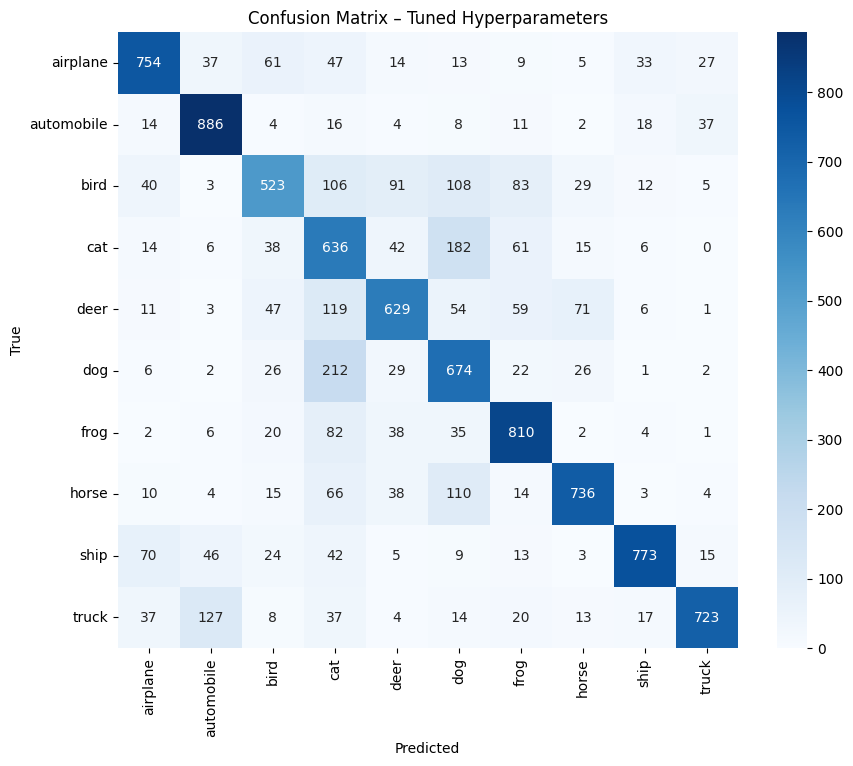

In [ ]:
#Confusion matrix
conf_matrix_tuned = confusion_matrix(y_true, y_pred_tuned)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_tuned, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix – Tuned Hyperparameters")
plt.show()

## Step 5 - Combined Model

In Step 5, all previous enhancements were combined into a single, more refined model—integrating increased depth, regularization (Dropout + L2), data augmentation, and hyperparameter tuning. This comprehensive approach yielded the best overall performance, achieving an accuracy and macro F1-score of 0.73, indicating a strong balance between precision and recall across most classes. The model demonstrated especially strong performance on truck (with a recall of 0.90), as well as on ship, automobile, frog, and horse, which are visually distinct and easier to classify. While bird recall remained relatively low at 0.49, the precision of 0.73 suggests the model is still fairly confident when it does identify a bird. This version stands out as the best so far because all techniques contributed and worked well together, as augmentation improved generalization, Dropout and L2 helped control overfitting, hyperparameter tuning enabled smoother, more stable learning, and added model depth allowed it to capture more complex features. Despite these improvements, the model still struggles somewhat with birds, cats, and dogs, which is understandable as these animals have similar features which can make it harder to discern, which means that further improvement may require more advanced approaches.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
#Data augmentation
datagen_final = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen_final.fit(X_train_final)

In [ ]:
#Final CNN model that has depth, dropout, nd L2
model_final = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#use adjusted Adam optimizer
model_final.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
#Training the final model
history_final = model_final.fit(
    datagen_final.flow(X_train_final, y_train_final, batch_size=128),
    epochs=30,
    validation_data=(X_val, y_val)
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 163s 512ms/step - accuracy: 0.2013 - loss: 2.2488 - val_accuracy: 0.4148 - val_loss: 1.6703
Epoch 2/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 203s 515ms/step - accuracy: 0.3742 - loss: 1.7594 - val_accuracy: 0.4629 - val_loss: 1.5380
Epoch 3/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 159s 509ms/step - accuracy: 0.4385 - loss: 1.6075 - val_accuracy: 0.5156 - val_loss: 1.4365
Epoch 4/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 208s 529ms/step - accuracy: 0.4664 - loss: 1.5268 - val_accuracy: 0.4980 - val_loss: 1.4836
Epoch 5/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 168s 535ms/step - accuracy: 0.4949 - loss: 1.4756 - val_accuracy: 0.5779 - val_loss: 1.2376
Epoch 6/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 176s 562ms/step - accuracy: 0.5163 - loss: 1.4020 - val_accuracy: 0.5768 - val_loss: 1.2288
Epoch 7/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 162s 515ms/step - accuracy: 0.5298 - loss: 1.3635 - val_accuracy: 0.5976 - val_loss: 1.1884
Epoch 8/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 150s 478ms/step - accuracy: 0.5532 -

In [ ]:
#Predict on test set
y_pred_probs_final = model_final.predict(X_test)
y_pred_final = np.argmax(y_pred_probs_final, axis=1)

print(classification_report(y_true, y_pred_final, target_names=class_names))

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step
              precision    recall  f1-score   support

    airplane       0.71      0.83      0.77      1000
  automobile       0.85      0.88      0.87      1000
        bird       0.73      0.49      0.59      1000
         cat       0.56      0.57      0.57      1000
        deer       0.79      0.56      0.65      1000
         dog       0.68      0.59      0.63      1000
        frog       0.72      0.83      0.77      1000
       horse       0.69      0.84      0.76      1000
        ship       0.89      0.81      0.85      1000
       truck       0.72      0.90      0.80      1000

    accuracy                           0.73     10000
   macro avg       0.74      0.73      0.73     10000
weighted avg       0.74      0.73      0.73     10000



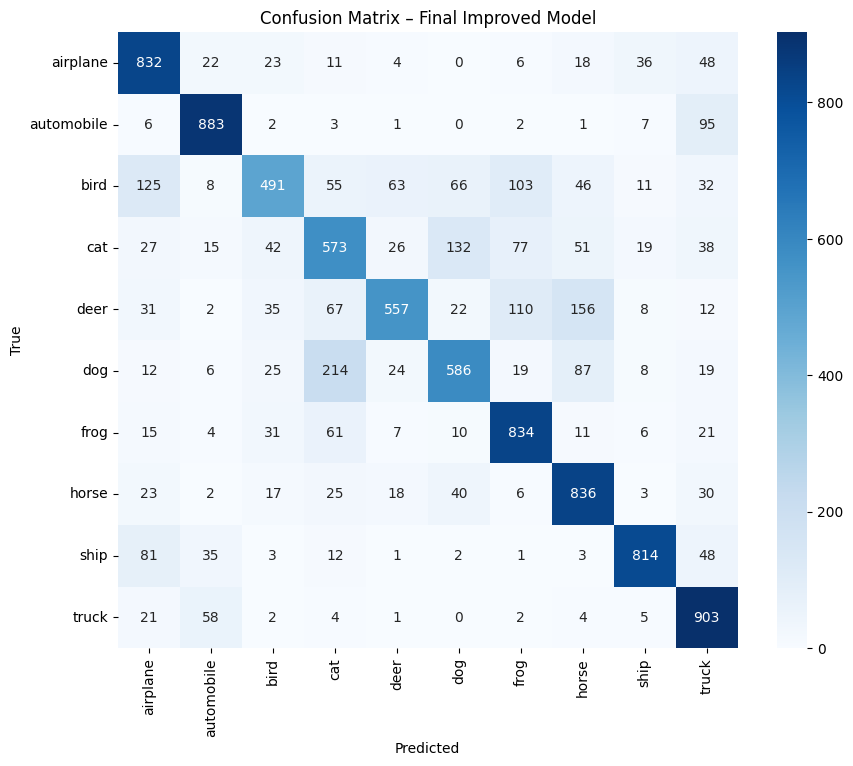

In [ ]:
#confusion matrix
conf_matrix_final = confusion_matrix(y_true, y_pred_final)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_final, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix – Final Improved Model")
plt.show()